# Function optimization using Simulated Annealing

* Simple quadratic function
* [Bohachevsky function](https://www.sfu.ca/~ssurjano/boha.html)
* [Bukin function](https://www.sfu.ca/~ssurjano/bukin6.html)
* [Gramacy \& Lee function](https://www.sfu.ca/~ssurjano/grlee12.html)
* [Griewank 1D function](https://www.sfu.ca/~ssurjano/griewank.html)
* [Griewank 2D function](https://www.sfu.ca/~ssurjano/griewank.html)
* [Griewank 3D function](https://www.sfu.ca/~ssurjano/griewank.html)

In [1]:
import math
import numpy as np
from optimization_algorithms_tools.algorithms import SimulatedAnnealing
from optimization_algorithms_tools.problems import ProblemBase, ContinuousFunctionBase

# Solving a simple quadratic function using SA

## $f(x)=(x-6)^2$ , $x\in [0,31]$

In [2]:
# define the objective function
def simple_example(x):
    return (x-6)**2

# define the bounds
simple_example_bounds = np.asarray([[0, 31]])

#create a continous function instance
simple_example_obj = ContinuousFunctionBase(simple_example, simple_example_bounds)

# define SA solver. Adding debug = 1 to print initial and final solution
sa = SimulatedAnnealing(max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=1)
# run the solver
sa.run(simple_example_obj)

Simulated annealing is initialized:
current value = 137.969146691263, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 5.5121575670543175e-09, curr temp:9.97938882337113e-05, curr best: sol: [5.99992576]


In [3]:
# Adding debug=2 (debug>1) for iteration tracing
sa_iter = SimulatedAnnealing(max_iter=100, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=2)

# show the steps
sa_iter.run(simple_example_obj)

Simulated annealing is initialized:
current value = 5.76110631348457, current temp=1000
curr iter: 1, curr value: 1.9465608391809786, curr best value: 0.025001197240314986, curr temp:1000, curr best: sol: [5.84188233]
curr iter: 2, curr value: 17.972586354800608, curr best value: 0.025001197240314986, curr temp:900.0, curr best: sol: [5.84188233]
curr iter: 3, curr value: 3.3441867548108224, curr best value: 0.0015095037986517506, curr temp:810.0, curr best: sol: [5.96114767]
curr iter: 4, curr value: 287.1402756303096, curr best value: 0.0015095037986517506, curr temp:729.0000000000001, curr best: sol: [5.96114767]
curr iter: 5, curr value: 31.365633667040665, curr best value: 0.0015095037986517506, curr temp:656.1, curr best: sol: [5.96114767]
curr iter: 6, curr value: 100.05523632507344, curr best value: 0.0015095037986517506, curr temp:590.4900000000001, curr best: sol: [5.96114767]
curr iter: 7, curr value: 88.60237474674433, curr best value: 0.0015095037986517506, curr temp:531.4

global minimum: x = 6.0002, f(x) = 0.0000


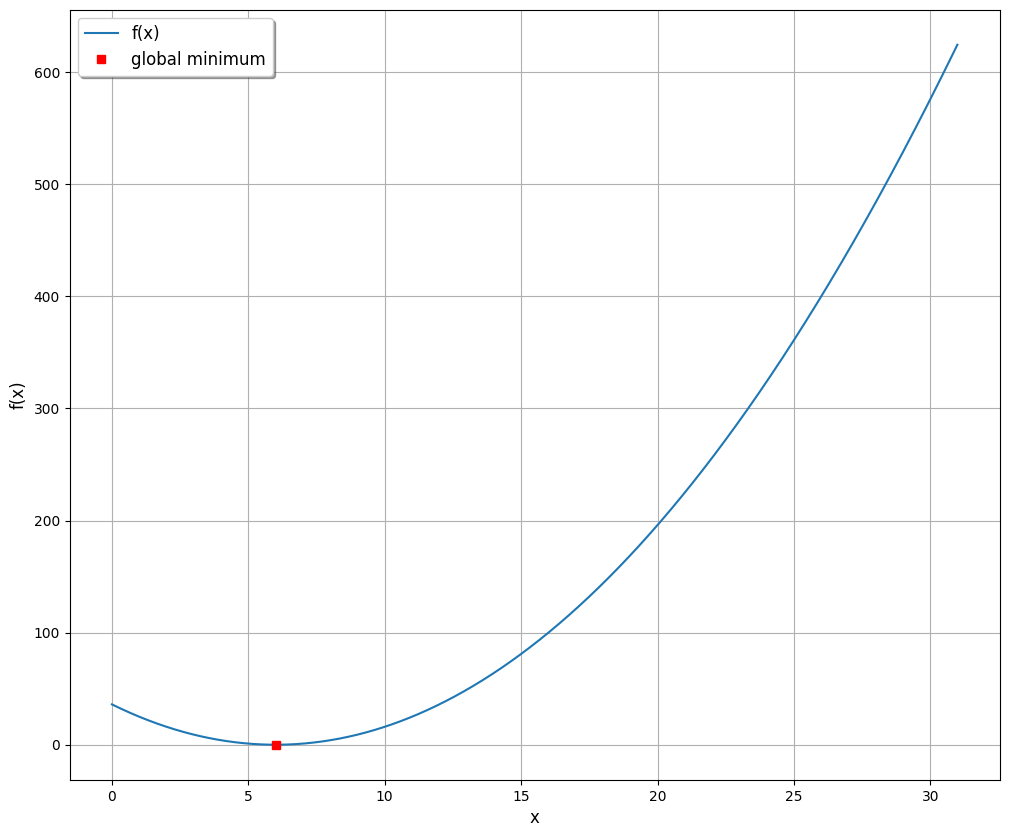

In [4]:
# plot the function and the solution
simple_example_obj.plot(sa_iter.s_best)

# Solving Bohachevsky function using SA

## $f(x_1,x_2)={x_1}^2 +2{x_2}^2-0.3cos(3\pi x_1)-0.4cos(4\pi x_2)+0.7$ , $x_1\in [-100,100]$ and $x_2\in [-100,100]$

In [5]:
def Bohachevsky(x_1, x_2):
    return x_1**2 +2*(x_2**2)-0.3*np.cos(3*np.pi*x_1)-0.4*np.cos(4*np.pi*x_2)+0.7

Bohachevsky_bounds = np.asarray([[-100, 100], [-100, 100]])
Bohachevsky_obj = ContinuousFunctionBase(Bohachevsky, Bohachevsky_bounds, 5)

In [6]:
sa.run(Bohachevsky_obj)

Simulated annealing is initialized:
current value = 7741.2938723505, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.010399285527036839, curr temp:9.97938882337113e-05, curr best: sol: [-0.00592567  0.01719794]


global minimum: x = -0.0059, 0.0172, f(x) = 0.0104


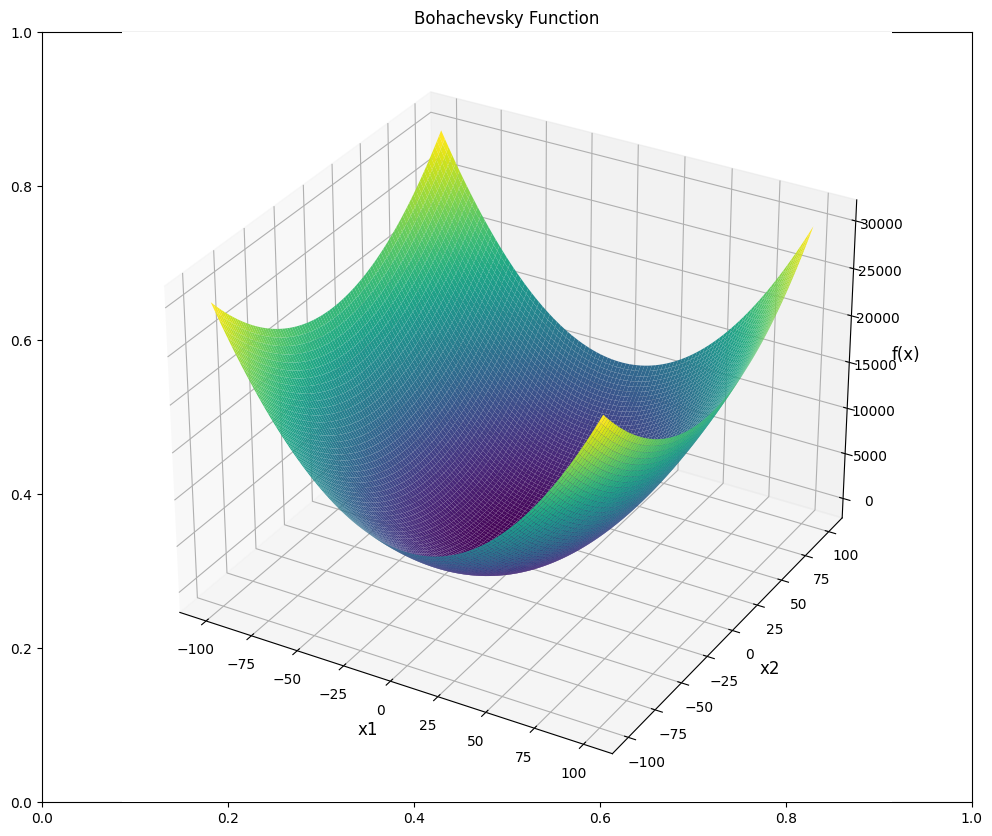

In [7]:
Bohachevsky_obj.plot(sa.s_best,'Bohachevsky Function')

# Solving Bukin function using SA

## $f(x_1,x_2)=100\sqrt|x_2-0.01{x_1}^2| + 0.01|x_1 + 10|$ , $x_1\in [-15,-5]$ and $x_2\in [-3,3]$

In [8]:
def bukin(x_1, x_2):
    return 100*math.sqrt(abs(x_2-0.01*x_1**2)) + 0.01 * abs(x_1 + 10)

bukin_bounds = np.asarray([[-15, -5], [-3, 3]])
bukin_obj = ContinuousFunctionBase(bukin, bukin_bounds, 5)

In [9]:
sa.run(bukin_obj)

Simulated annealing is initialized:
current value = 60.73784664253138, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.6093437608551259, curr temp:9.97938882337113e-05, curr best: sol: [-14.63282848   2.14122839]


global minimum: x = -14.6328, 2.1412, f(x) = 0.6093


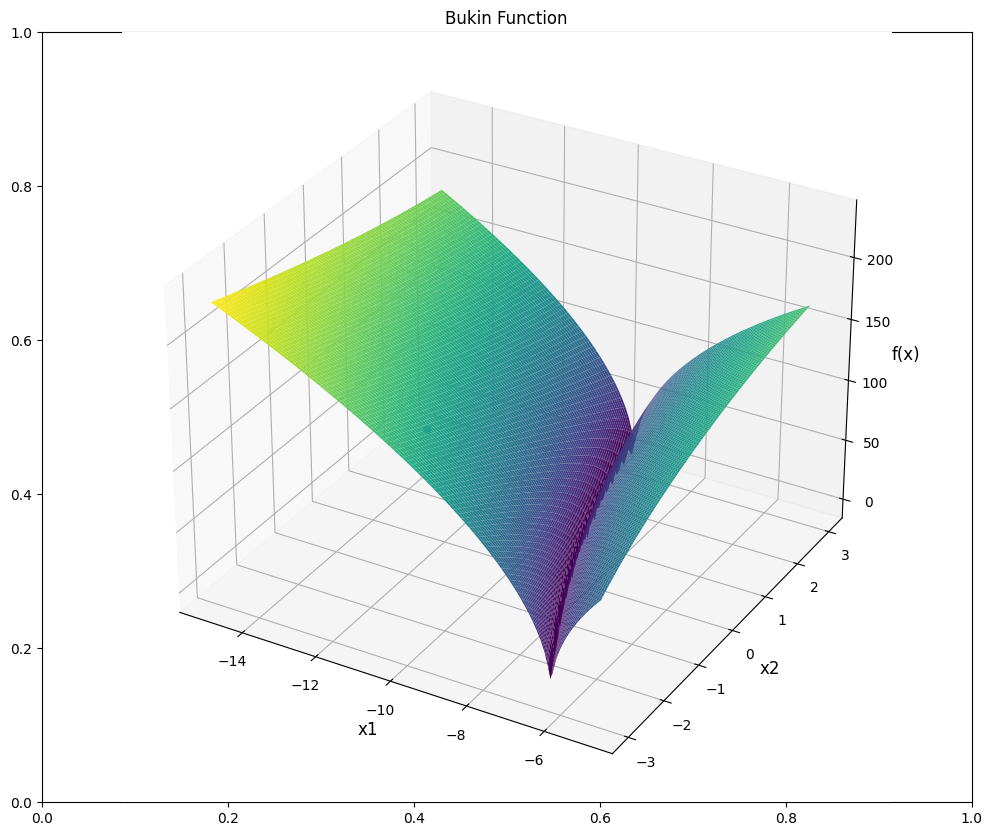

In [10]:
bukin_obj.plot(sa.s_best,'Bukin Function')

# Solving Gramacy & Lee function using SA

## $f(x)=\frac{sin(10\pi x)}{2x} + (x-1)^4$ , $x\in [0.5,2.5]$

In [11]:
def gramacy_and_lee(x):
    return math.sin(10*math.pi*x)/(2*x) + (x-1)**4

gramacy_and_lee_bounds = np.asarray([[0.5, 2.5]])
gramacy_and_lee_obj = ContinuousFunctionBase(gramacy_and_lee, gramacy_and_lee_bounds, .1)

In [12]:
sa.run(gramacy_and_lee_obj)

Simulated annealing is initialized:
current value = 1.782736053395167, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: -0.8690111331479323, curr temp:9.97938882337113e-05, curr best: sol: [0.54856547]


global minimum: x = 0.5486, f(x) = -0.8690


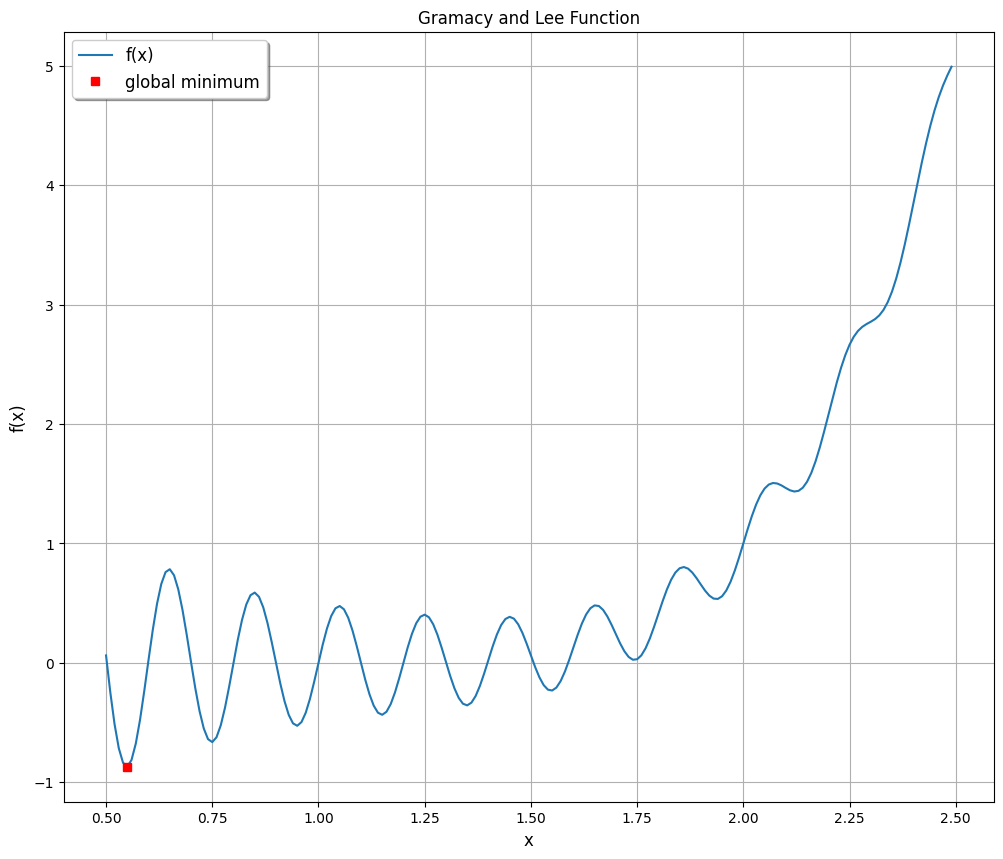

In [13]:
gramacy_and_lee_obj.plot(sa.s_best,'Gramacy and Lee Function')

# Solving Griewank 1D function using SA

## $f(x)=\sum_{i=1}^{d} \frac{{x_i}^2}{4000} + \prod_{i=1}^{d} cos(\frac{x_i}{\sqrt{i}}) +1 $ , $x\in [-600, 600]$

In [14]:
def griewank(*x):
    x = np.asarray(x)
    return np.sum(x**2/4000) - np.prod(np.cos(x/np.sqrt(np.asarray(range(1, len(x)+1))))) + 1

griewank_bounds = np.asarray([[-600, 600]])
griewank_1d=ContinuousFunctionBase(griewank, griewank_bounds, 10)

In [15]:
sa.run(griewank_1d)

Simulated annealing is initialized:
current value = 88.09563083330507, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 3.272197378278996e-06, curr temp:9.97938882337113e-05, curr best: sol: [-0.00255756]


global minimum: x = -0.0026, f(x) = 0.0000


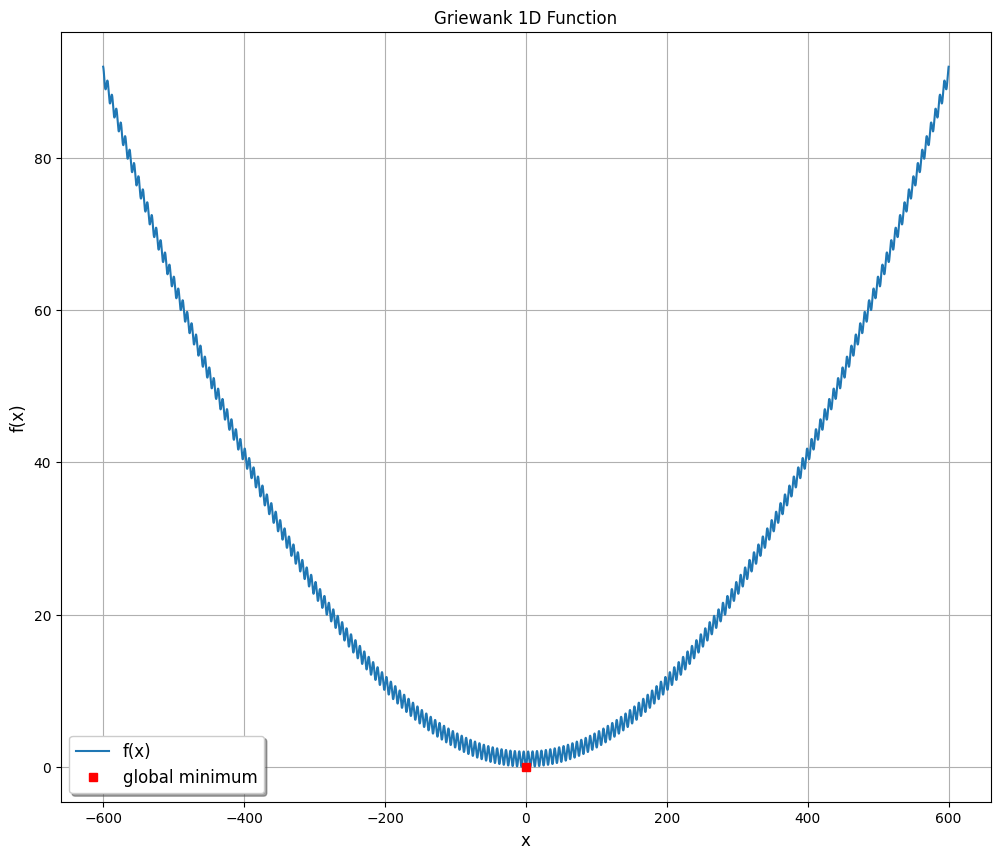

In [16]:
griewank_1d.plot(sa.s_best,'Griewank 1D Function')

# Solving Griewank 2D function using SA

In [17]:
griewank_bounds_2d = np.asarray([[-600, 600]]*2)
griewank_2d=ContinuousFunctionBase(griewank, griewank_bounds_2d, (griewank_bounds_2d[:, 1] - griewank_bounds_2d[:, 0])/10)

sa.run(griewank_2d)

Simulated annealing is initialized:
current value = 31.964609797723117, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.060753821419741394, curr temp:9.97938882337113e-05, curr best: sol: [12.39838399 -0.18295535]


global minimum: x = 12.3984, -0.1830, f(x) = 0.0608


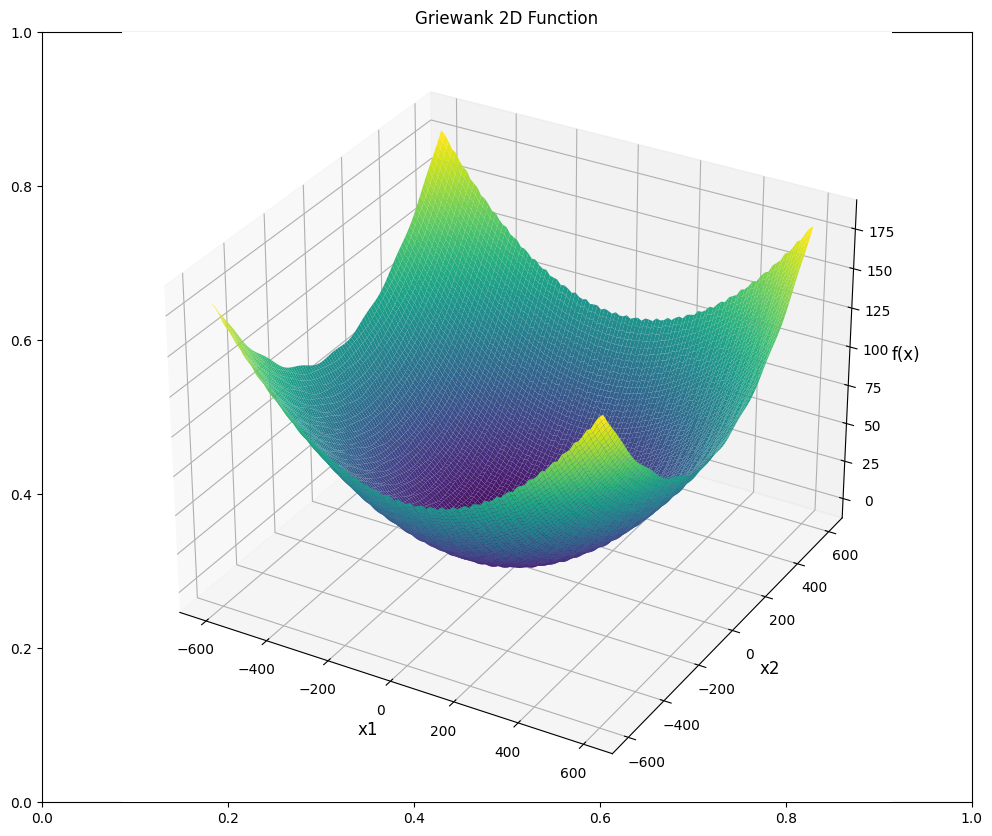

In [18]:
griewank_2d.plot(sa.s_best,'Griewank 2D Function')

# Solving Griewank 3D function using SA

In [ ]:
griewank_bounds_3d = np.asarray([[-600, 600]]*3)
griewank_3d=ContinuousFunctionBase(griewank, griewank_bounds_3d, (griewank_bounds_3d[:, 1] - griewank_bounds_3d[:, 0])/10)

# Changing the parameters for SA for more complex problem
sa = SimulatedAnnealing(max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='linear_inverse', cooling_alpha=0.9, debug=1)

sa.run(griewank_3d)

Simulated annealing is initialized:
current value = 88.36882128512191, current temp=10000
